In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import statsmodels.api as sma

In [5]:
mower = pd.read_csv(Path.cwd() / 'data' / 'mower.csv', index_col=['owner'])
mower.head()

,income,size
owner,,
yes,20.0,9.2
yes,28.5,8.4
yes,21.6,10.8
yes,20.5,10.4
yes,29.0,11.8


In [6]:
y = mower.index
X = mower.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((18, 2), (6, 2))

In [11]:
clf = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs').fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [12]:
y_hat == y_test

array([ True, False,  True,  True,  True, False])

In [13]:
clf.coef_, clf.intercept_

(array([[0.23527645, 1.05912327]]), array([-15.70074138]))

In [33]:
logodds = np.dot(X_test, clf.coef_.T) + clf.intercept_
logodds

array([[ 1.2429556 ],
       [-0.05068567],
       [-4.28717875],
       [-1.51030983],
       [-3.29856257],
       [-0.09872695]])

In [34]:
def prob(logodds):
    odds = np.exp(logodds)
    prob = odds / (1 + odds)
    return prob

In [40]:
prob(logodds).round(5)

array([[0.77608],
       [0.48733],
       [0.01356],
       [0.18089],
       [0.03562],
       [0.47534]])

In [44]:
y_proba = clf.predict_proba(X_test)[:, 1].round(5)
y_proba

array([0.77608, 0.48733, 0.01356, 0.18089, 0.03562, 0.47534])

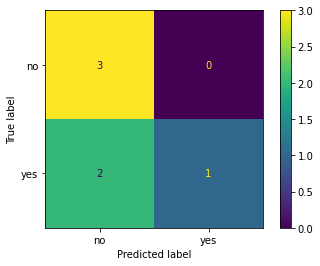

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [49]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          no       0.60      1.00      0.75         3
         yes       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [55]:
aX_train = sma.add_constant(X_train)
ay_train = y_train.copy()
aX_train, ay_train

(array([[ 1. , 17.6, 10.4],
        [ 1. , 21. ,  7.4],
        [ 1. , 28. ,  8.8],
        [ 1. , 23. , 10. ],
        [ 1. , 36. ,  8.8],
        [ 1. , 16.4,  8.8],
        [ 1. , 29. , 11.8],
        [ 1. , 21.6, 10.8],
        [ 1. , 36.7,  9.6],
        [ 1. , 19.8,  8. ],
        [ 1. , 31. , 10.4],
        [ 1. , 27.6, 11.2],
        [ 1. , 22. ,  9.2],
        [ 1. , 20.5, 10.4],
        [ 1. , 20. ,  9.2],
        [ 1. , 11. ,  9.4],
        [ 1. , 14.4, 10.2],
        [ 1. , 25. ,  9.8]]),
 Index(['no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes',
        'yes', 'no', 'yes', 'yes', 'no', 'no', 'no'],
       dtype='object', name='owner'))

In [56]:
iy = [0] * len(ay_train)
iy

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [59]:
for i in range(len(ay_train)):
    if (ay_train[i] == 'yes'):
        iy[i] =1
    else:
        iy[i] = 0

In [60]:
iy

[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]

In [61]:
mower_sm = sma.Logit(iy, aX_train).fit()
mower_sm.params

Optimization terminated successfully.
         Current function value: 0.333991
         Iterations 8


array([-26.83840235,   0.28986683,   2.07193934])

In [62]:
mower_sm.predict(sma.add_constant(X_test))

array([8.46498153e-01, 7.06960307e-01, 6.06565621e-04, 5.96027581e-02,
       5.12440192e-03, 2.36329883e-01])

In [63]:
mower_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   18
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                  0.5182
Time:                        14:59:35   Log-Likelihood:                -6.0118
converged:                       True   LL-Null:                       -12.477
Covariance Type:            nonrobust   LLR p-value:                  0.001557
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.8384     14.408     -1.863      0.063     -55.078       1.402
x1             0.2899      0.156      1.855      0.064      -0.016       0.596
x2             2.0719      1.244      1.665      0.096      -0.367       4.511
==============================================================================
"""